<a href="https://colab.research.google.com/github/hoseinAkbari97/machine_learning_course/blob/main/Chapter_01_Supervised_Learning/regression/Linear_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Generating and plotting the data

In [6]:
def generate_data(n=50, noise=5.0):
  """This is a function to generate data"""
  np.random.seed(42)
  x = np.linspace(-10, 10, n)
  # The true and desired line is: y = 3x + 8
  true_slope = 3
  true_intercept = 8
  noise = np.random.randn(n) * noise
  y = true_slope * x + true_intercept + noise
  return x, y

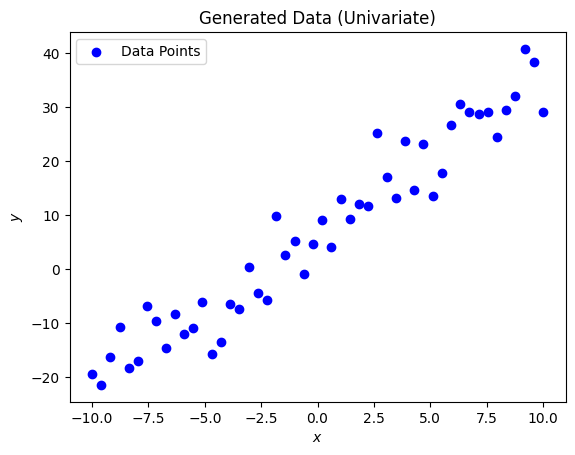

In [7]:
# Generating data and plotting them
X , y = generate_data(n=50, noise=5.0)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title('Generated Data (Univariate)')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Linear Regression: Analytical Solution

Implement the Closed-Form Solution

In [8]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_x(x, w):
  """Equivalent to w_0 + w_1 * x"""
  return w[0] + w[1] * x

def linear_regression_closed_form(x, y):
  """Linear Regression using the closed-form solution
  first step is adding the bias term (x_0 = 1) to input vector x
  This makes x_b as the full input vector with bias term"""
  x_b = np.c_[np.ones((len(x), 1)), x]

  # The closed-form solution is w = (X^T * X)^-1 * X^T * y
  w = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
  return w

# Get parameter vector w
w = linear_regression_closed_form(X, y)
print("Parameter vector (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")



Parameter vector (w): 
w_1 = 2.86, w_0 = 6.87


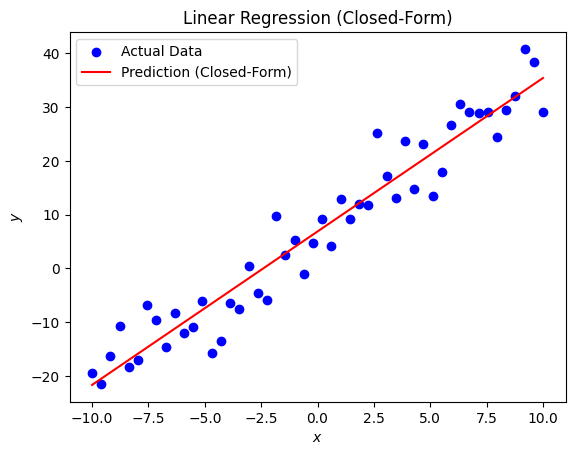

In [9]:
# Plotting the results

y_pred = h_x(X, w)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed-Form)')
plt.title('Linear Regression (Closed-Form)')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

# **Polynomial Regression: Analytical Solution**

# Engineering Polynomial Features

In [10]:
def polynomial_features(X, degree):
  """Function to generate polynomial features"""
  X_poly = np.c_[np.ones(len(X))]
  for i in range(1, degree + 1):
    X_poly = np.c_[X_poly, np.power(X, i)]
  return X_poly

# Implement Polynomial Regression

In [11]:
def polynomial_regression(X, y, degree):
  """Polynomial Regression"""
  X_poly = polynomial_features(X, degree)

  # Closed-form solution: w = (X'T * X')^-1 * X'^T * y
  w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
  return w

# Degree of the polynomial regression
m = 5
# Parameter vector w
w_poly = polynomial_regression(X, y, m)

print(f"Parameters (w) for degree {m}:")
print(w_poly)

Parameters (w) for degree 5:
[ 5.88112811e+00  3.55957762e+00  3.28108945e-02 -2.15493734e-02
 -6.78082560e-05  1.38175494e-04]


# Visualizing the Polynomial Fit

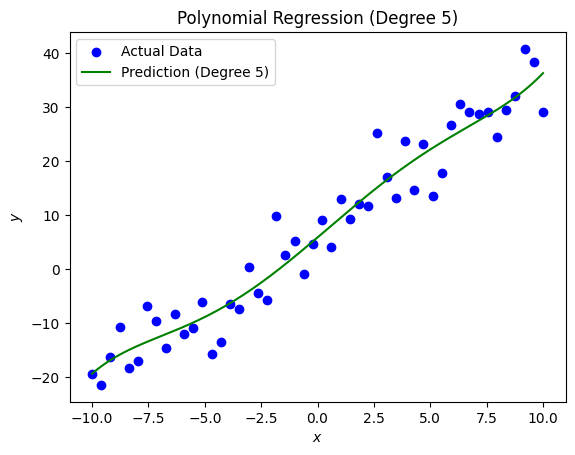

In [12]:
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)

# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Prediction (Degree {m})')
plt.title(f'Polynomial Regression (Degree {m})')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()